In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Stores.csv')
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [3]:
df.isna().any()

Store ID                False
Store_Area              False
Items_Available         False
Daily_Customer_Count    False
Store_Sales             False
dtype: bool

In [4]:
df.drop_duplicates(inplace = True)
df

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [5]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [6]:
df.rename({'Store ID ':'Store_ID'}, axis=1, inplace = True)
df

,Store_ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
...,...,...,...,...,...
891,892,1582,1910,1080,66390
892,893,1387,1663,850,82080
893,894,1200,1436,1060,76440
894,895,1299,1560,770,96610


In [7]:
print(len(set(df['Store_Area'])))

583


In [8]:
print(len(set(df['Items_Available'])))

616


# Initial information
- Data set has 896 stores - identify by ID
- On 583 Areas 
- Sale 616 Items
Questions:
1. Compare customers and Store Sale by Area. Which area is the best sale, which has the best visit from customers daily
2. Breakdown by Store ID
3. Is there any relationship between Item available, Customer Count and Sale

In [9]:
#Question 1: Compare customers and Store Sale by Area. Which area is the best sale?
Sale_Area = df.groupby('Store_Area').sum()['Store_Sales']
Sale_Area

Store_Area
775     42530
780     25600
854     77740
869     52540
891     67370
        ...  
2063    51480
2067    70230
2169    67080
2214    65900
2229    87410
Name: Store_Sales, Length: 583, dtype: int64

In [10]:
Area_highest = ''
Area_Lowest = ''
for store, sale in Sale_Area.items():
    if sale == Sale_Area.max():
        Area_highest = store
    elif sale == Sale_Area.min():
        Area_Lowest = store

print('Highest sale by Area:',Sale_Area.max(), "   Store_Area:", Area_highest)
print('Lowest sale:',Sale_Area.min(), "   Store_Area:", Area_Lowest)
print('Average sale by Area:',Sale_Area.mean())

Highest sale by Area: 362330    Store_Area: 1440
Lowest sale: 21650    Store_Area: 1876
Average sale by Area: 91215.72898799313


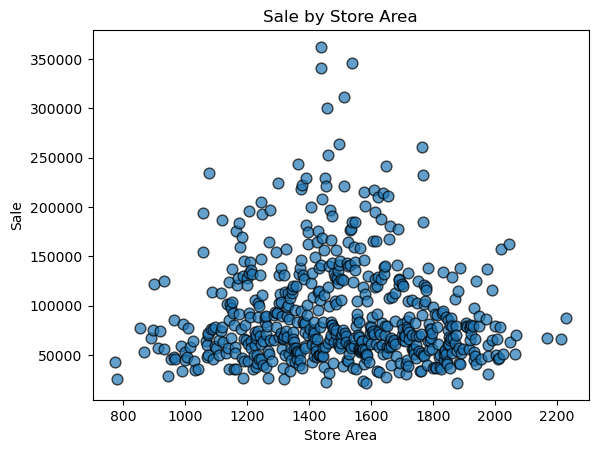

In [11]:
Area = []
for store, sale in Sale_Area.items():
    Area.append(store)
    
fig, ax = plt.subplots()
ax.scatter(Area, Sale_Area, s=60, alpha=0.7, edgecolors="k")

plt.xlabel('Store Area')
plt.ylabel('Sale')
plt.title('Sale by Store Area')
plt.show()

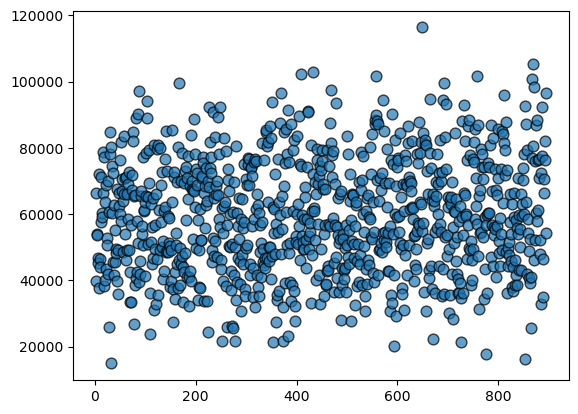

In [12]:
fig, ax = plt.subplots()
ax.scatter(df['Store_ID'], df['Store_Sales'], s=60, alpha=0.7, edgecolors="k")
plt.show()

In [13]:
print('Highest Sale by Store ID:',df['Store_Sales'].max(), 'Store ID: ', df.loc[df['Store_Sales']==df['Store_Sales'].max(),'Store_ID'])
print('Lowest Sale by Store ID:',df['Store_Sales'].min(), 'Store ID: ', df.loc[df['Store_Sales']==df['Store_Sales'].min(),'Store_ID'])
print('Average Sale by Store:', df['Store_Sales'].mean())


Highest Sale by Store ID: 116320 Store ID:  649    650
Name: Store_ID, dtype: int64
Lowest Sale by Store ID: 14920 Store ID:  31    32
Name: Store_ID, dtype: int64
Average Sale by Store: 59351.30580357143


# Summary about Sale by Store and Area:
1. By Store: Sale from 14,000 - 116,000, no highlight found from store ID and Sale
2. By Area: Sale from 21,000 - 362,000, we have top 5 highest area which has significant better Sales versus others

In [14]:
Customer_Area = df.groupby('Store_Area').sum()['Daily_Customer_Count']

print('The Highest Customer Count by Area:',Customer_Area.max())
print('The lowest Customer Count by:',Customer_Area.min())
print('Average customer count by Area:',Customer_Area.mean())

The Highest Customer Count by Area: 4460
The lowest Customer Count by: 70
Average customer count by Area: 1208.52487135506


In [15]:
print('Highest Customer Count by Store ID:',df['Daily_Customer_Count'].max(), 'Store ID: ', df.loc[df['Daily_Customer_Count']==df['Daily_Customer_Count'].max(),'Store_ID'])
print('Lowest Customer Count by Store ID:',df['Daily_Customer_Count'].min(), 'Store ID: ', df.loc[df['Daily_Customer_Count']==df['Daily_Customer_Count'].min(),'Store_ID'])
print('Average Customer Count by Store:', df['Daily_Customer_Count'].mean())

Highest Customer Count by Store ID: 1560 Store ID:  848    849
Name: Store_ID, dtype: int64
Lowest Customer Count by Store ID: 10 Store ID:  39    40
Name: Store_ID, dtype: int64
Average Customer Count by Store: 786.3504464285714


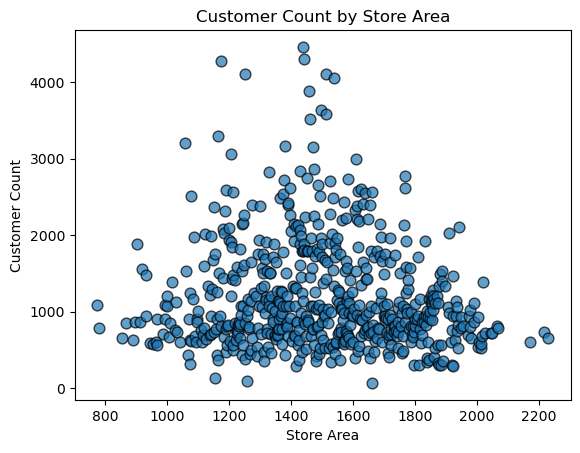

In [16]:
Area_1 = []
for store, sale in Customer_Area.items():
    Area_1.append(store)
    
fig, ax = plt.subplots()
ax.scatter(Area_1, Customer_Area, s=60, alpha=0.7, edgecolors="k")

plt.xlabel('Store Area')
plt.ylabel('Customer Count')
plt.title('Customer Count by Store Area')
plt.show()

# About Customer count daily
1. By Store: average ~800 customer daily, range: 10-1560
2. By Area: arerage 1200 customer daily, range 70-4000
- We can see that store ID/store area we have a wide range of sale and customer serving daily. 
- We cannot make 1 analysis apply for all group. Instead, let's categorize store area into 3 groups high, medium and low demand for management make deeper analysis. Group: 20M-100M; 100M-200M; 200M-300M

In [51]:
#Seperate by percentage of sale contribution
Categorize_Area=pd.cut(Sale_Area, bins = [20000,100000,200000,400000], labels = ['20M-100M','100M-200M','200M-400M'])
print('Store Area by groups:')
print(Categorize_Area.value_counts())
print('Percentage of Store Area by groups:')
print(Categorize_Area.value_counts()/Categorize_Area.count()*100)

Store Area by groups:
20M-100M     396
100M-200M    159
200M-400M     28
Name: Store_Sales, dtype: int64
Percentage of Store Area by groups:
20M-100M     67.924528
100M-200M    27.272727
200M-400M     4.802744
Name: Store_Sales, dtype: float64


In [52]:
#Create new dataFrame for Store_Area to make further analysis
df1 = Categorize_Area.to_frame().reset_index()   #Create DataFrame of Store Area & Category (this is df1 and we will analyze on df1)
df2=Customer_Area.to_frame().reset_index()  #Create Customer_Area to DataFrame 
df1['Daily_Customer_Count']=df2['Daily_Customer_Count']  #Add new column to df1, column name Daily_Customer_Count
Item_Avai = (df.groupby('Store_Area').sum()['Items_Available']).to_frame().reset_index() #Re-do above steps, just a bit different codes
df1['Items_Available']=Item_Avai['Items_Available']
df1.rename({'Store_Sales':'Store_Categorize'}, axis=1, inplace = True) 
df3=Sale_Area.to_frame().reset_index() #Re-do above steps
df1['Total_Sale']=df3['Store_Sales']
df1['Earn/Customer']=df1['Total_Sale']/df1['Daily_Customer_Count']
df1

,Store_Area,Store_Categorize,Daily_Customer_Count,Items_Available,Total_Sale,Earn/Customer
0,775,20M-100M,1090,932,42530,39.018349
1,780,20M-100M,790,951,25600,32.405063
2,854,20M-100M,660,1018,77740,117.787879
3,869,20M-100M,850,1050,52540,61.811765
4,891,20M-100M,630,1073,67370,106.936508
...,...,...,...,...,...,...
578,2063,20M-100M,810,2493,51480,63.555556
579,2067,20M-100M,790,2492,70230,88.898734
580,2169,20M-100M,600,2617,67080,111.800000
581,2214,20M-100M,740,2647,65900,89.054054


In [53]:
Top_Area = df1.loc[df1['Store_Categorize'] == '200M-400M']
Top_Area = Top_Area.sort_values('Total_Sale',ascending=False)
Top_Area

,Store_Area,Store_Categorize,Daily_Customer_Count,Items_Available,Total_Sale,Earn/Customer
246,1440,200M-400M,4300,8659,362330,84.262791
322,1539,200M-400M,4060,9205,345940,85.206897
245,1439,200M-400M,4460,8640,341400,76.547085
305,1513,200M-400M,3590,9073,311570,86.788301
260,1458,200M-400M,3880,8710,300200,77.371134
292,1496,200M-400M,3630,7152,263890,72.696970
470,1766,200M-400M,2620,8489,261250,99.713740
262,1462,200M-400M,3520,7025,252820,71.823864
188,1365,200M-400M,2490,4919,243340,97.726908
402,1648,200M-400M,2210,5979,241730,109.380090


C:\Users\vy\AppData\Local\Temp\ipykernel_13024\3806211609.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Store_Area, rotation = 90, size=8)


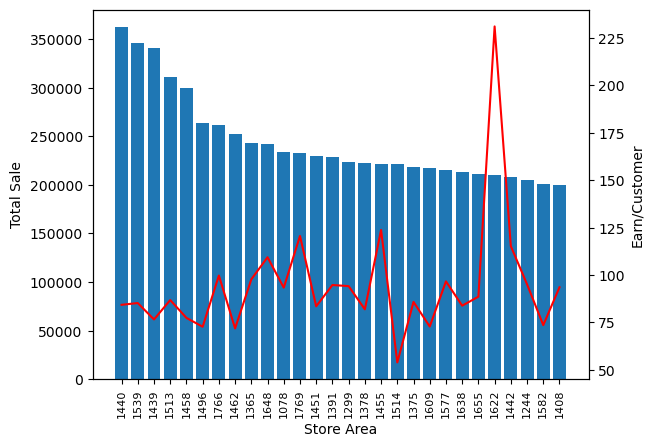

In [54]:
Store_Area=Top_Area['Store_Area'].tolist()
Store_Area = [str(x) for x in Store_Area]
Total_Sale=Top_Area['Total_Sale'].tolist()
Earn_Customer=Top_Area['Earn/Customer'].tolist()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Store_Area, Total_Sale)
ax2.plot(Store_Area, Earn_Customer, 'r-')

ax1.set_xticklabels(Store_Area, rotation = 90, size=8)
ax1.set_xlabel('Store Area')
ax1.set_ylabel('Total Sale')
ax2.set_ylabel('Earn/Customer')


plt.show()

C:\Users\vy\AppData\Local\Temp\ipykernel_13024\1000715189.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Top_Area['Store_Area'], rotation = 90, size=8)


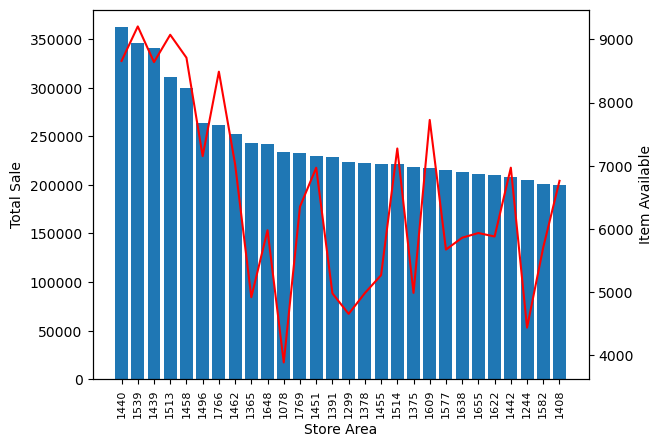

In [55]:
fig, ax1 = plt.subplots()
Top_Area['Store_Area']=Top_Area['Store_Area'].astype(str)
ax2 = ax1.twinx()
ax1.bar(Top_Area['Store_Area'], Top_Area['Total_Sale'])
ax2.plot(Top_Area['Store_Area'], Top_Area['Items_Available'], 'r-')

ax1.set_xticklabels(Top_Area['Store_Area'], rotation = 90, size=8)
ax1.set_xlabel('Store Area')
ax1.set_ylabel('Total Sale')
ax2.set_ylabel('Item Available')


plt.show()

# Conclusion about relationship between sale, customer and item available
we can see from 2 above charts that quantity of item available is not proportional with Sale; and quantity of daily customer is also not proportional with Sale (presented by earn/customer of each area is not proportional with Sale).
- Recommendation for further analysis: We can make a hypothesis that some items are not favorred by customer, and some items might bring higher sales. Therefore, to increase Sales, we can analyze deeper to items category and choose which items bring better Sale, then reapply for other Store

# Table Compare between 3 groups
DataFrame Groups present average value of each groups on Sale, Daily Customer and Item Available. From this table, we can easy see that scale of Sale is relevant to Customer served and Item sold. (this is total picture, and it can be changed when we analyze deeper into each groups. This case helps us see difference between big picture and small cases)

In [56]:
Groups = df1.groupby('Store_Categorize').mean()['Total_Sale'].to_frame().reset_index()
Groups['Daily_Customer_Count']=df1.groupby('Store_Categorize').mean()['Daily_Customer_Count'].to_frame().reset_index()['Daily_Customer_Count']
Groups['Items_Available']=df1.groupby('Store_Categorize').mean()['Items_Available'].to_frame().reset_index()['Items_Available']
Groups['Earn/Customer']=Groups['Total_Sale']/Groups['Daily_Customer_Count']
Groups

,Store_Categorize,Total_Sale,Daily_Customer_Count,Items_Available,Earn/Customer
0,20M-100M,62228.964646,859.520202,1966.863636,72.399653
1,100M-200M,136441.635220,1801.132075,3997.905660,75.753265
2,200M-400M,244352.857143,2779.285714,6505.678571,87.919301


In [57]:
df1.to_csv('Store_Sorted.csv', mode = 'w', index = False)